In [1]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
from skimage import color

from skimage.exposure import histogram
from matplotlib.pyplot import bar
import os


In [2]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.axis('off')
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

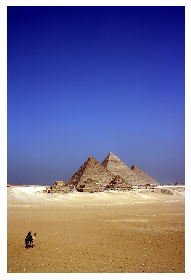

In [3]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
plt.axis('off')
io.imshow(pyramids)
io.show()

In [4]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    plt.axis('off')
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

## Requirement 1

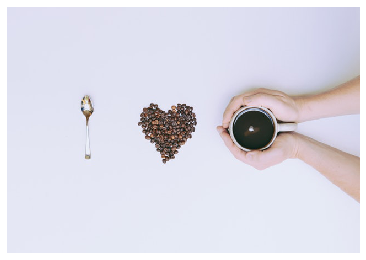

(446, 640, 3)

In [5]:
coffee = io.imread('coffee.jpeg')
io.imshow(coffee)
plt.axis('off')
io.show()
coffee.shape

 ### Show half of the image

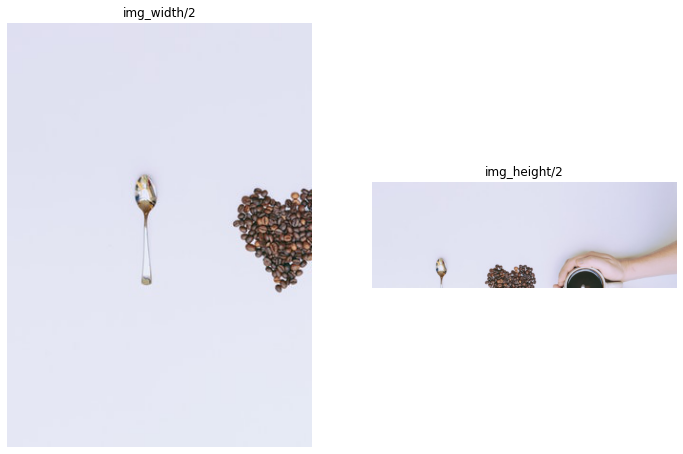

In [6]:
coffee_halfed_v1=coffee[:, :coffee.shape[1]//2 , :]
coffee_halfed_v2=coffee[:coffee.shape[0]//2, : , :]

show_images([coffee_halfed_v1,coffee_halfed_v2],['img_width/2','img_height/2'])

 ### RGB -> Gray

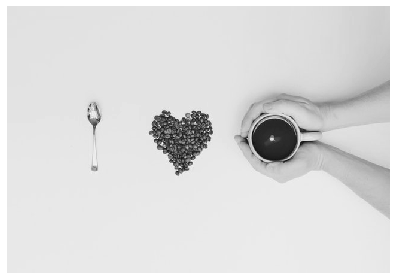

In [7]:
gray_coffee=rgb2gray(coffee)
plt.axis('off')
io.imshow(gray_coffee)
io.show()

# Requirement 2.1 

In [8]:
def gray_image(img):
    gray=rgb2gray(img)
    show_images([img,gray],['Img','Img gray'])
    
def HSV_image(img):
    hsv = rgb2hsv(img)
    hue = hsv[:,:,0]
    saturation = hsv[:,:,1]
    value = hsv[:,:,2]
    # show the images side by side (as required)
    show_images([img,hue,saturation,value],['Img','Img_hue','Img_sat','Img_value'])

 ### test gray_image

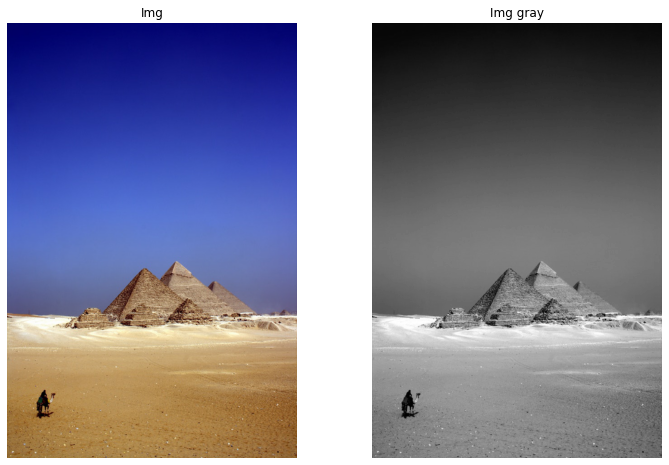

In [9]:
gray_image(io.imread('pyramids.jpeg'))  

 test HSV_image 

ex1.png


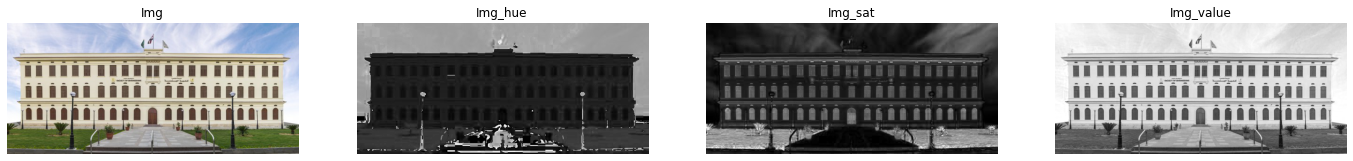

ex2.jpg


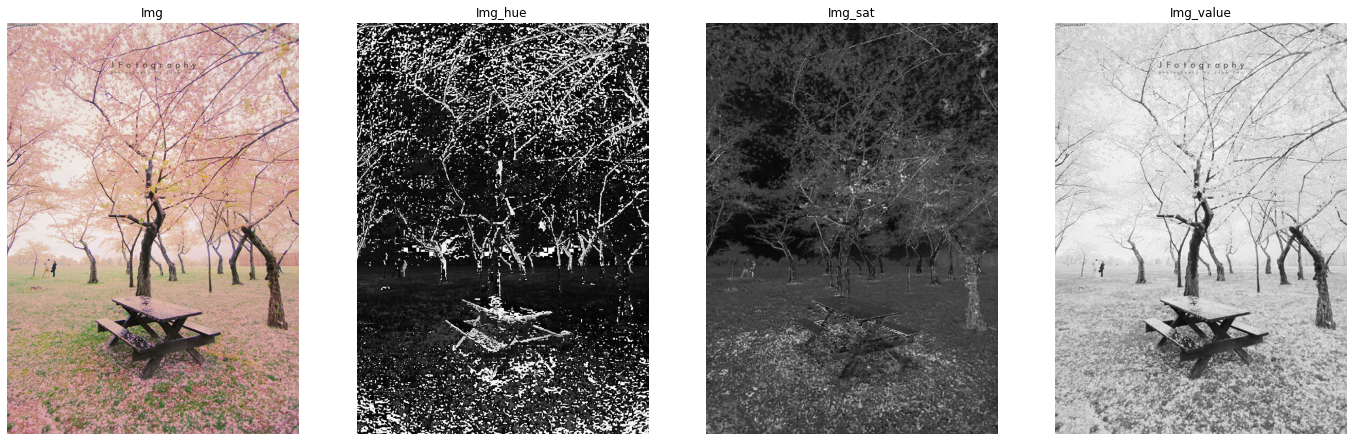

ex3.jpg


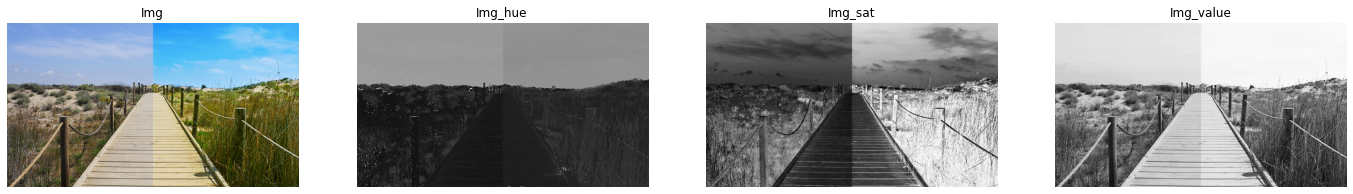

In [10]:
for filename in os.scandir('hsv/'):
    print(filename.name)
    HSV_image(io.imread(filename.path))

### Hue
- Hue is the color portion of the model, expressed as a number from 0 to 360 degrees

### Saturation
- Saturation describes the amount of gray in a particular color, from 0 to 100 percent, Reducing this component toward zero introduces more gray and produces a faded effect

### Value (or Brightness)
- Value works in conjunction with saturation and describes the brightness or intensity of the color, from 0 to 100 percent, where 0 is completely black, and 100 is the brightest and reveals the most color.

# Requirement 2.2 

In [11]:
def noise(path):
    # array of amounts
    amounts = [0.02, 0.5, 0.9]

    # iterate on a directory of images
    for filename in os.scandir(path):
        fig = plt.figure(figsize=(10, 7))
        rows = 2
        columns = 2
        count = 1
        # Load the image
        img = io.imread(filename.path)

        # convert rgb to gray scale
        fig.add_subplot(rows, columns, count)
        grayScale = color.rgb2gray(img)
        io.imshow(grayScale)
        plt.axis('off')
        plt.title('grayscale')
        # plt.show()

        for amount in amounts:
            count = count + 1
            fig.add_subplot(rows, columns, count)
            # Add salt-and-pepper noise to the image.
            # returns a floating-point image on the range [0, 1]
            noiseImage = random_noise(grayScale, mode='s&p', amount=amount)

            # Display noise image
            io.imshow(noiseImage)
            plt.axis('off')
            plt.title(f'noise with amount {amount}')

        plt.show()


### Q1

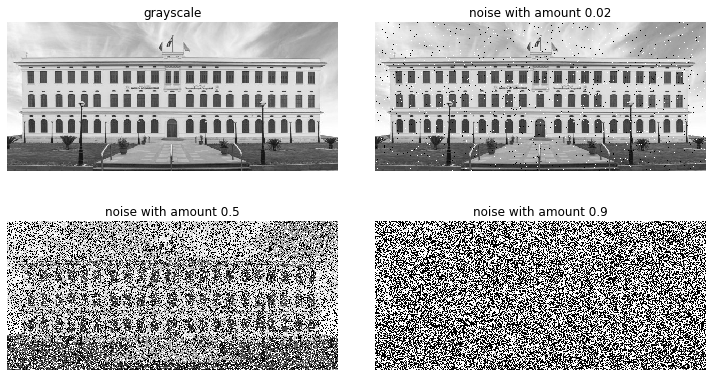

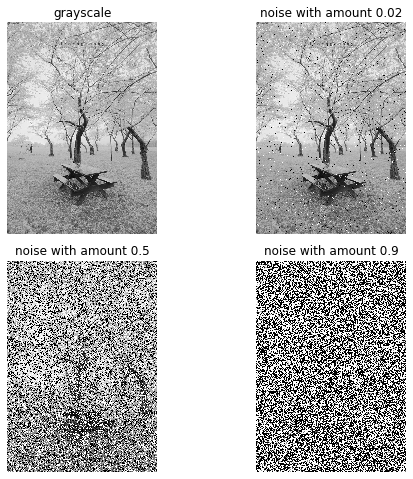

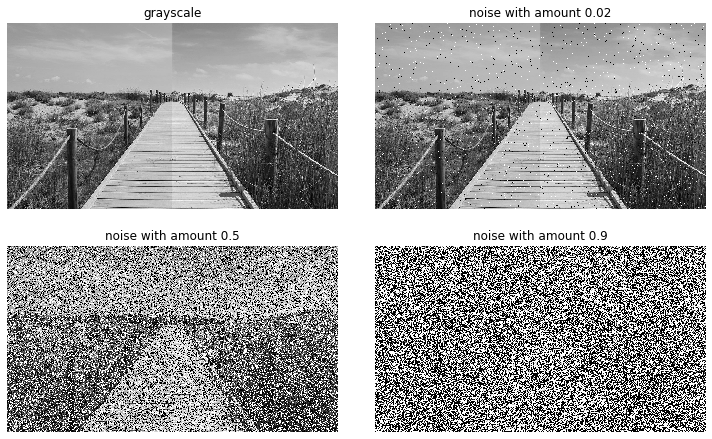

In [12]:
noise("./hsv")

### Q2 
  - reading ./hsv/ex2.jpg (Tree image) which it doesn't affected by noise clearly because it has many zeros and ones in image's pixel and also has random pixels already ,so  it doesn't affected by noise filtration greatly.

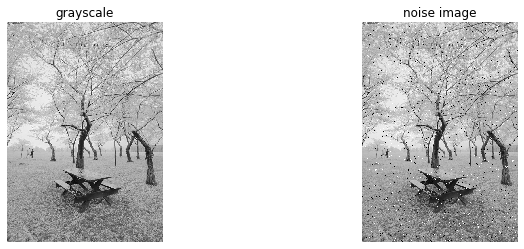

In [13]:
# reading image
img=io.imread('./hsv/ex2.jpg')
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)

# convert to gray-scale
grayScale=color.rgb2gray(img)
io.imshow(grayScale)
plt.axis('off')
plt.title('grayscale')

# adding noise s&p on gray-scale image
noiseImage = random_noise(grayScale, mode='s&p', amount=0.02)
fig.add_subplot(2, 2, 2)
io.imshow(noiseImage)
plt.axis('off')
plt.title('noise image')

#plot images
plt.show()

# Requirement 3.1 

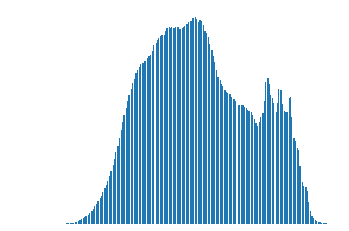

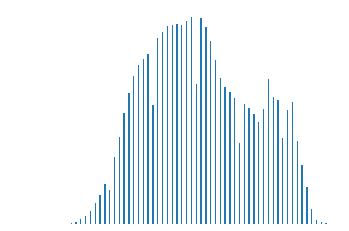

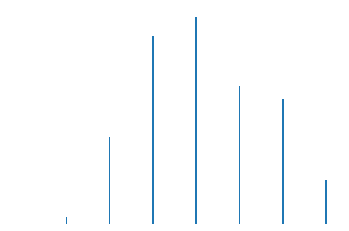

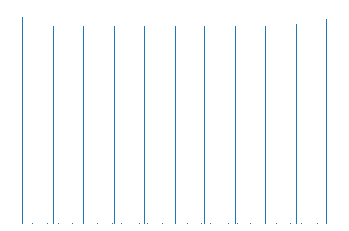

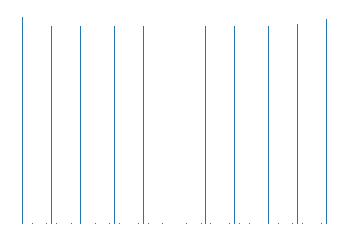

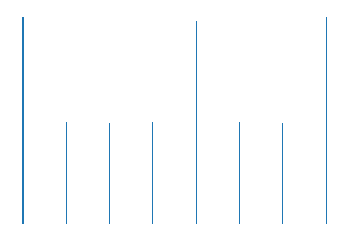

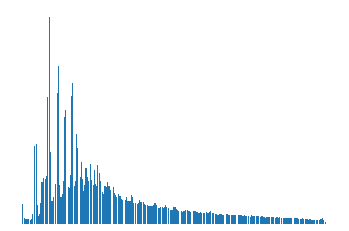

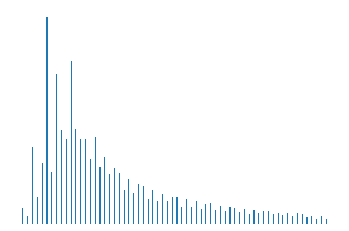

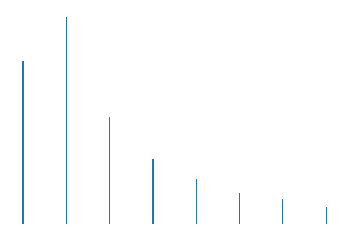

In [14]:
from pathlib import Path

bins = [256, 64, 8]
for file in Path('histogram').iterdir():
    img = io.imread(file, as_gray=True)
    for i in range(len(bins)):
        hist = histogram(img, nbins=bins[i])
        showHist(img, hist)

# Requirement 3.2 

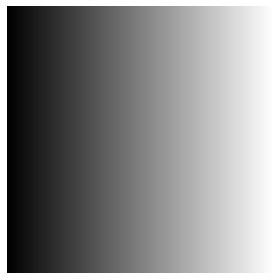

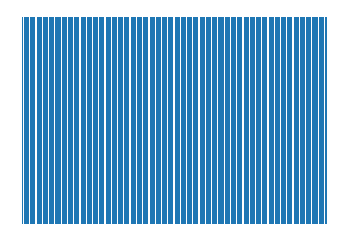

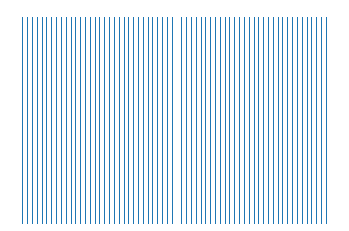

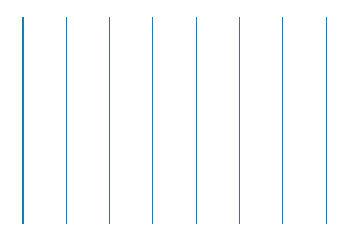

In [15]:
n = 256
img = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        img[i][j] = j / 256 # Normalizing the image
        
# print(img.shape)
# print(img)
plt.axis('off')
io.imshow(img)
bins = [256, 64, 8]
for i in range(len(bins)):
    hist = histogram(img, nbins=bins[i])
    showHist(img, hist)